<a href="https://colab.research.google.com/github/rabiaozdemir/Transfer_Learning/blob/main/MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Model,Sequential
from keras.applications import xception, vgg16, mobilenet
from keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D,GlobalAveragePooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, Input,Concatenate,AveragePooling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import SGD
from keras import backend as K
import pandas as pd
import numpy as np
from keras import layers
from keras.models import load_model, model_from_json
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
%matplotlib inline
import os
from pathlib import Path


from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions




from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D,GlobalAveragePooling2D

from tensorflow.keras.applications import ResNet50,Xception

from keras.utils import np_utils




from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16

import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization,Activation,Add
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D,GlobalAveragePooling2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
train_path="./drive/MyDrive/chest_xray/train"
test_path="./drive/MyDrive/chest_xray/test"

trainDataGen=ImageDataGenerator(rescale=1./255, validation_split=0.1)
testDataGen=ImageDataGenerator(rescale=1./255)

trainGen=trainDataGen.flow_from_directory(
    train_path,
    target_size=(224,224),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=128,
    subset="training"
    )

valGen=trainDataGen.flow_from_directory(
    train_path,
    target_size=(224,224),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=128,
    subset="validation"
)

testGen=testDataGen.flow_from_directory(
    test_path,
    target_size=(224,224),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=1
    )

Found 4711 images belonging to 3 classes.
Found 521 images belonging to 3 classes.
Found 624 images belonging to 3 classes.


In [ ]:
 model_MobileNet=tf.keras.applications.MobileNet(weights='imagenet',include_top=False)
 print(model_MobileNet.summary())


Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, None, None, 

In [ ]:
model_MobileNet.trainable=False
x=model_MobileNet.output
x=GlobalAveragePooling2D()(x)
x=Dense(64,activation='relu')(x)
x=Dense(64,activation='relu')(x)
x=Dense(16,activation='relu')(x)
output=Dense(3,activation='softmax')(x)
for layer in model_MobileNet.layers:
    layer.trainable=False

In [ ]:
New_model_MobileNet=Model(inputs=model_MobileNet.input,outputs=output)

In [ ]:
print(New_model_MobileNet.summary())

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, None, None, 32)    0   

{'BACTERIA': 0, 'NORMAL': 1, 'PNEUMONIA': 2}
(32, 224, 224, 3)
(32, 3)
(32, 224, 224, 3)
(32, 3)
(32, 224, 224, 3)
(32, 3)
(32, 224, 224, 3)
(32, 3)
(32, 224, 224, 3)
(32, 3)
(32, 224, 224, 3)
(32, 3)


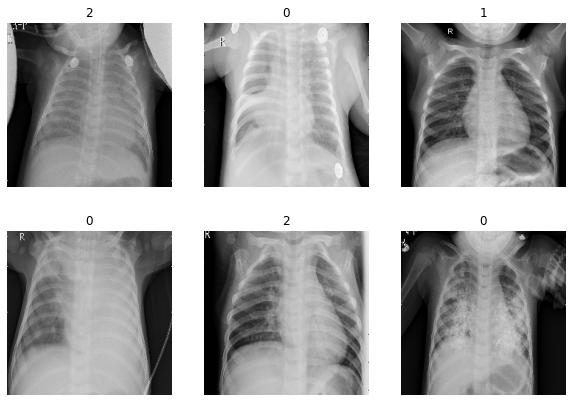

In [ ]:
print (trainGen.class_indices)
plt.figure(figsize=(10,7))
for i in range(6):
 img,y=trainGen.next()
 print(img.shape)
 print(y.shape)
 plt.subplot(2,3,i+1)
 plt.title(list(y[:3][0]).index(1))
 plt.axis('off')
 plt.imshow(img[0])

In [ ]:
New_model_MobileNet.compile(optimizer='ADAM', loss='categorical_crossentropy',metrics=["accuracy"])

In [ ]:
history=New_model_MobileNet.fit(
 trainGen,
 steps_per_epoch=trainGen.samples//128,
 epochs=5,
 validation_data=valGen,
 validation_steps=valGen.samples//128,
 #shuffle=True,
 #callbacks=[checkpoint]
 )

Epoch 1/5
36/36 [==============================] - ETA: 0s - batch: 17.5000 - size: 127.3056 - loss: 0.8081 - accuracy: 0.6334

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


36/36 [==============================] - 367s 10s/step - batch: 17.5000 - size: 127.3056 - loss: 0.8081 - accuracy: 0.6334 - val_loss: 1.1456 - val_accuracy: 0.4414
Epoch 2/5
36/36 [==============================] - 359s 10s/step - batch: 17.5000 - size: 127.3056 - loss: 0.5304 - accuracy: 0.7724 - val_loss: 0.9992 - val_accuracy: 0.4414
Epoch 3/5
36/36 [==============================] - 361s 10s/step - batch: 17.5000 - size: 127.3056 - loss: 0.4786 - accuracy: 0.7929 - val_loss: 1.0854 - val_accuracy: 0.5273
Epoch 4/5
36/36 [==============================] - 367s 10s/step - batch: 17.5000 - size: 128.0000 - loss: 0.4464 - accuracy: 0.8049 - val_loss: 0.8720 - val_accuracy: 0.5664
Epoch 5/5
36/36 [==============================] - 364s 10s/step - batch: 17.5000 - size: 126.6111 - loss: 0.4309 - accuracy: 0.8093 - val_loss: 1.1132 - val_accuracy: 0.5254


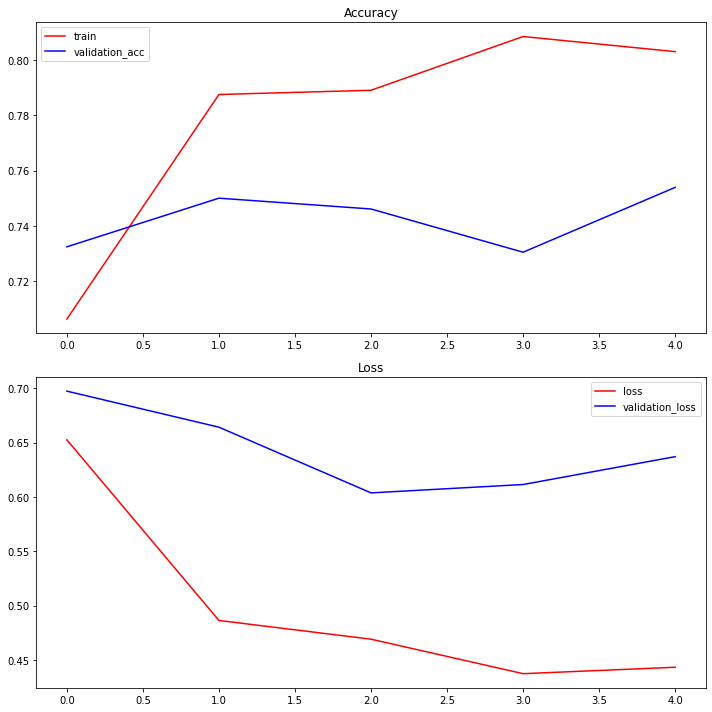

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["accuracy"], color='r',label='train')
plt.plot(history.history["val_accuracy"], color='b',label='validation_acc')
plt.legend(loc='best')
plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"], color='r',label='loss')
plt.plot(history.history["val_loss"], color='b',label='validation_loss')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
print("Test Loss : ",score[0])
print("Test Accuracy % : ",score[1]*100)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred=np.argmax(New_model_MobileNet.predict(testGen), axis=1)
print('Confusion Matrix')
print(confusion_matrix(testGen.classes,y_pred))

In [ ]:
print('Classification Report')
target_names=['bacteria_pneumonia', 'normal', 'virus_pneumonia']
print(classification_report(testGen.classes, y_pred, target_names=target_names))